<a href="https://colab.research.google.com/github/LTrinhKhang/AI-Week-1/blob/main/AI_W4_Fuzzy_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=38b7a3efc50a8bf1f505b1fa2d904852237e4bfda6404704c354fbb6616c1fcf
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

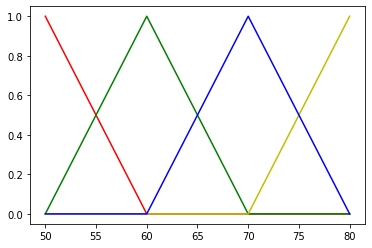

In [13]:

x=np.arange(50,81,1)#tao mien du lieu tu 50 den 80 voi do phan giai bang 1
slow = fuzz.trimf(x,[50,50,60])#tao tam giac tren truc x vs gia tri a,b,c bang ham ve tam giac (trimf)
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
fast = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'g',linewidth=1.5,label='medium')
plt.plot(x,fast,'y',linewidth=1.5,label='fast')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='medium_fast')

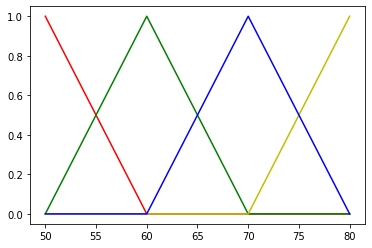

In [14]:
x=np.arange(50,81,1)#tao mien du lieu tu 50 den 80 voi do phan giai bang 1
slow = fuzz.trapmf(x,[50,50,50,60])#tao thang tren truc x vs gia tri a,b,c,d bang ham ve hinh thang (trapmf)
medium = fuzz.trapmf(x,[50,60,60,70])
medium_fast = fuzz.trapmf(x,[60,70,70,80])
fast = fuzz.trapmf(x,[70,80,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'g',linewidth=1.5,label='medium')
plt.plot(x,fast,'y',linewidth=1.5,label='fast')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='medium_fast')

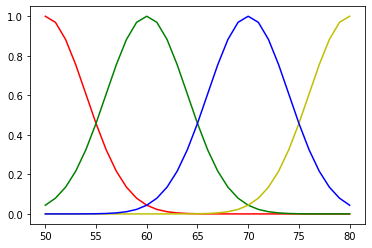

In [18]:

x=np.arange(50,81,1)#tao mien du lieu tu 50 den 80 voi do phan giai bang 1
slow = fuzz.gaussmf(x,50,4)#tao parabol tren truc x vs gia tri a va phuong sai =b bang ham parabol (gaussmf)//ex: gaussmf(x,60,4)
medium = fuzz.gaussmf(x,60,4)
medium_fast = fuzz.gaussmf(x,70,4)
fast = fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'g',linewidth=1.5,label='medium')
plt.plot(x,fast,'y',linewidth=1.5,label='fast')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='medium_fast')

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food  = ctrl.Antecedent(np.arange(0,11,1),'food') #tao bang dieu khien voi ngo vao bang ham Antecdent
service =ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')#tao bang dieu khien voi ngo ra bang ham Consequent
food ['Poor']=fuzz.trimf(food.universe,[0,0,5])#tao tam giac vs ham universe lay gia tri tu ctrl
food ['Average']=fuzz.trimf(food.universe,[0,5,10])
food ['Good']=fuzz.trimf(food.universe,[5,10,10])
service ['Poor']=fuzz.trimf(service.universe,[0,0,5])
service ['Average']=fuzz.trimf(service.universe,[0,5,10])
service ['Good']=fuzz.trimf(service.universe,[5,10,10])
tip ['Less']=fuzz.trimf(tip.universe,[10,10,25])
tip ['Average']=fuzz.trimf(tip.universe,[10,25,30])
tip ['Much']=fuzz.trimf(tip.universe,[25,30,30])


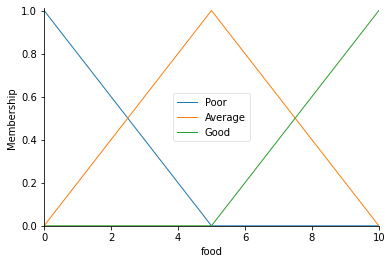

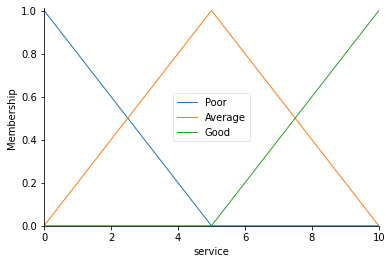

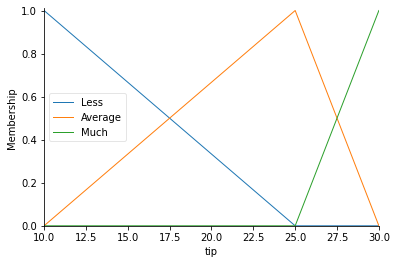

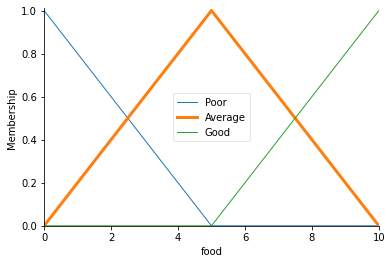

In [39]:
food.view()
service.view()
tip.view()
food['Average'].view()
# xem lai cac do thi da tao

In [41]:
#tao luat cho bang dieu khien
rule1=ctrl.Rule(food['Poor']&service['Poor'],tip['Less'])
rule2=ctrl.Rule(food['Poor']&service['Average'],tip['Less'])
rule3=ctrl.Rule(food['Poor']&service['Good'],tip['Less'])
rule4=ctrl.Rule(food['Average']&service['Poor'],tip['Less'])
rule5=ctrl.Rule(food['Average']&service['Average'],tip['Average'])
rule6=ctrl.Rule(food['Average']&service['Good'],tip['Much'])
rule7=ctrl.Rule(food['Good']&service['Poor'],tip['Much'])
rule8=ctrl.Rule(food['Good']&service['Average'],tip['Much'])
rule9=ctrl.Rule(food['Good']&service['Poor'],tip['Much'])

27.740740740740744


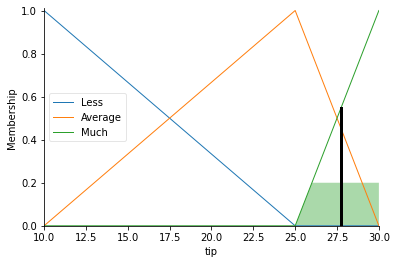

In [49]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food']=10
tipping.input['service']=9

tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


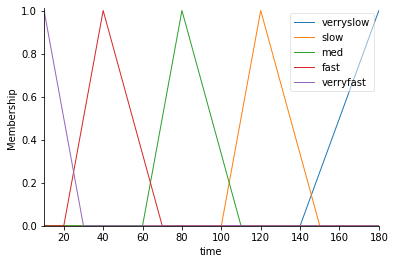

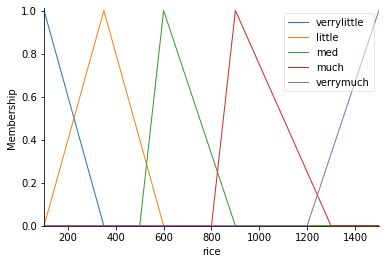

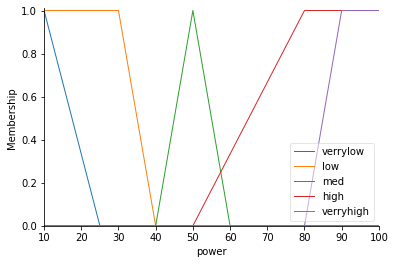

In [71]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rice  = ctrl.Antecedent(np.arange(100,1501,1),'rice') #tao bang dieu khien voi ngo vao bang ham Antecdent
time =ctrl.Antecedent(np.arange(10,181,1),'time')
power = ctrl.Consequent(np.arange(10,101,1),'power')#tao bang dieu khien voi ngo ra bang ham Consequent
rice ['verrylittle']=fuzz.trimf(rice.universe,[100,100,350])#tao tam giac vs ham universe lay gia tri tu ctrl
rice ['little']=fuzz.trimf(rice.universe,[100,350,600])
rice ['med']=fuzz.trimf(rice.universe,[500,600,900])
rice ['much']=fuzz.trimf(rice.universe,[800,900,1300])
rice ['verrymuch']=fuzz.trimf(rice.universe,[1200,1500,1500])
time ['verryslow']=fuzz.trimf(time.universe,[140,180,180])#tao tam giac vs ham universe lay gia tri tu ctrl
time ['slow']=fuzz.trimf(time.universe,[100,120,150])
time ['med']=fuzz.trimf(time.universe,[60,80,110])
time ['fast']=fuzz.trimf(time.universe,[20,40,70])
time ['verryfast']=fuzz.trimf(time.universe,[10,10,30])
power ['verrylow']=fuzz.trapmf(power.universe,[10,10,10,25])#tao tam giac vs ham universe lay gia tri tu ctrl
power ['low']=fuzz.trapmf(power.universe,[10,10,30,40])
power ['med']=fuzz.trimf(power.universe,[40,50,60])
power ['high']=fuzz.trapmf(power.universe,[50,80,100,100])
power ['verryhigh']=fuzz.trapmf(power.universe,[80,90,100,100])
time.view()
rice.view()
power.view()


14.999999999999996


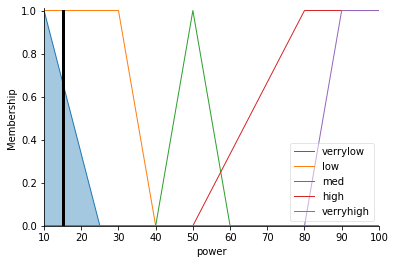

In [74]:
rule1=ctrl.Rule(rice['verrylittle']&time['verryslow'],power['med'])
rule2=ctrl.Rule(rice['verrylittle']&time['slow'],power['low'])
rule3=ctrl.Rule(rice['verrylittle']&time['med'],power['low'])
rule4=ctrl.Rule(rice['verrylittle']&time['fast'],power['verrylow'])
rule5=ctrl.Rule(rice['verrylittle']&time['verryfast'],power['verrylow'])
rule6=ctrl.Rule(rice['little']&time['verryslow'],power['med'])
rule7=ctrl.Rule(rice['little']&time['slow'],power['med'])
rule8=ctrl.Rule(rice['little']&time['med'],power['low'])
rule9=ctrl.Rule(rice['little']&time['fast'],power['verrylow'])
rule10=ctrl.Rule(rice['little']&time['verryfast'],power['verrylow'])
rule11=ctrl.Rule(rice['med']&time['verryslow'],power['med'])
rule12=ctrl.Rule(rice['med']&time['slow'],power['med'])
rule13=ctrl.Rule(rice['med']&time['med'],power['med'])
rule14=ctrl.Rule(rice['med']&time['fast'],power['low'])
rule15=ctrl.Rule(rice['med']&time['verryfast'],power['low'])
rule16=ctrl.Rule(rice['much']&time['verryslow'],power['high'])
rule17=ctrl.Rule(rice['much']&time['slow'],power['med'])
rule18=ctrl.Rule(rice['much']&time['med'],power['med'])
rule19=ctrl.Rule(rice['much']&time['fast'],power['low'])
rule20=ctrl.Rule(rice['much']&time['verryfast'],power['low'])
rule21=ctrl.Rule(rice['verrymuch']&time['verryslow'],power['verryhigh'])
rule22=ctrl.Rule(rice['verrymuch']&time['slow'],power['verryhigh'])
rule23=ctrl.Rule(rice['verrymuch']&time['med'],power['high'])
rule24=ctrl.Rule(rice['verrymuch']&time['fast'],power['high'])
rule25=ctrl.Rule(rice['verrymuch']&time['verryfast'],power['med'])
powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['rice']=10
powering.input['time']=9

powering.compute()
print(powering.output['power'])
power.view(sim=powering)
